<a href="https://colab.research.google.com/github/Kenjiro1/Formacao_IA/blob/main/Deteccao_Anomalias/SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Media movel

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = np.random.normal(0,1,100) + np.linspace(0,1,100)
data[50] = 4
data[80] = -4

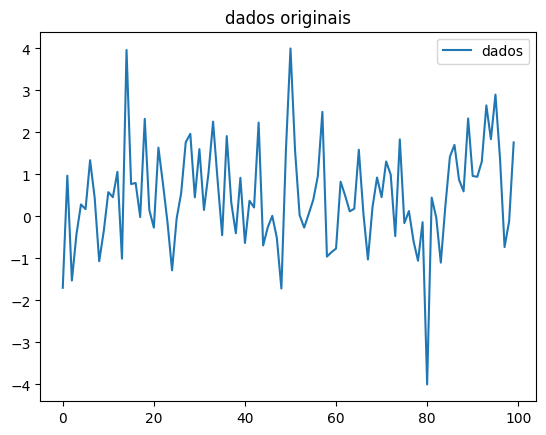

In [ ]:
plt.plot(data,label='dados')
plt.title('dados originais')
plt.legend()
plt.show()

In [ ]:
s = pd.Series(data)
s_ma = s.rolling(10).mean() #rolling(quantidades de periodos para considerarmos a media)


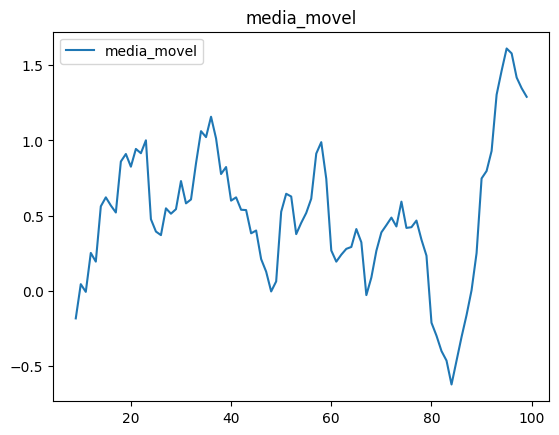

In [ ]:
plt.plot(s_ma,label='media_movel')
plt.title('media_movel')
plt.legend()
plt.show()

In [ ]:
anomalies = s[np.abs(s-s_ma) > 2 * s.std()]
anomalies

,0
14,3.964478
50,4.000000
80,-4.000000


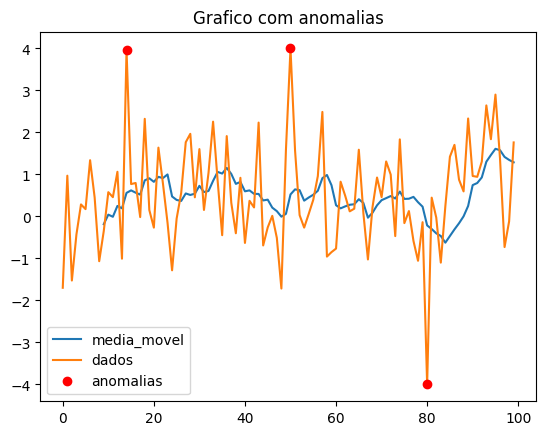

In [ ]:
plt.plot(s_ma,label='media_movel')
plt.plot(s,label='dados')
plt.plot(anomalies,'ro', label='anomalias')
plt.title('Grafico com anomalias')
plt.legend()
plt.show()

#ExpSmoothing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import  SimpleExpSmoothing

In [ ]:
np.random.seed(5)

data = np.random.normal(0,1,100) + np.linspace(0,1,100)
data[50] = 4

modelo = SimpleExpSmoothing(data)
model_fit = modelo.fit(smoothing_level=0.2)

data_pred= model_fit.predict(0,len(data) -1 )

data_pred

/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


array([ 0.44122749,  0.44122749,  0.28882816,  0.72125717,  0.53264792,
        0.45612111,  0.69149412,  0.38347003,  0.20259011,  0.21575435,
        0.1248113 , -0.11850186, -0.11355457, -0.13836702,  0.03626333,
       -0.27566421, -0.33026415, -0.00160988,  0.40452173,  0.05774511,
        0.21354943,  0.015122  , -0.11684878, -0.22341042, -0.21676528,
        0.07436059,  0.25247778,  0.26633632,  0.19495234,  0.2131853 ,
        0.20794801,  0.38557513,  0.24477204,  0.25922512,  0.25383324,
        0.26129183,  0.32958406,  0.37592654,  0.64245842,  0.57335929,
        0.84978177,  0.6994629 ,  0.54685232,  0.54247797,  0.59193876,
        0.61636238,  0.84239167,  0.99471123,  0.98960655,  0.82138769,
        0.73597718,  1.38878174,  1.25830652,  0.8495411 ,  0.64879054,
        0.51262069,  0.75164862,  0.69301741,  1.1215868 ,  1.14576505,
        1.06076532,  0.8826836 ,  1.02381506,  0.89616235,  0.67937791,
        0.7864218 ,  0.76300224,  0.98154727,  0.90587269,  0.29

In [ ]:
anomalies = np.where(np.abs(data-data_pred) > 3*np.std(data))[0]
anomalies

array([50])

In [ ]:
data[anomalies]

array([4.])

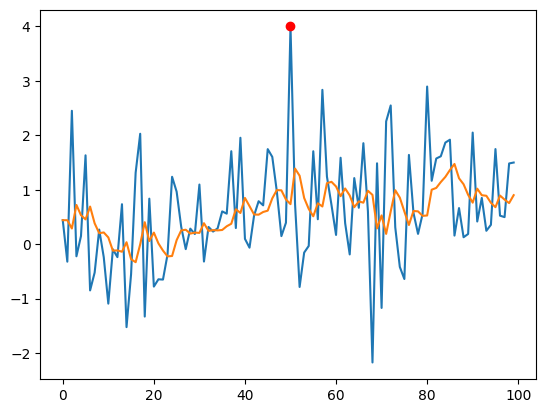

In [ ]:
plt.plot(data,label='Dados Originais')
plt.plot(data_pred, label='Suavizacao Exponencial')
plt.plot(anomalies, data[anomalies], 'ro', label='anomalias')

#STD (Seasonal and Trend Decomposition)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [ ]:
url='https://raw.githubusercontent.com/Kenjiro1/Formacao_IA/refs/heads/main/dados/Salestrain.csv'

data_frame = pd.read_csv(url)
data_frame = data_frame['data'].values
data_frame.shape

(96,)

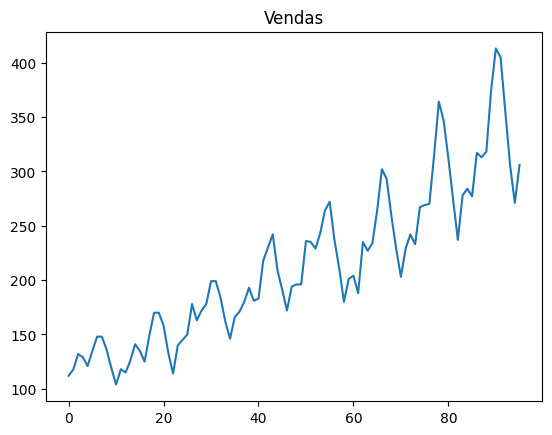

In [ ]:
plt.plot(data_frame, label='dados')
plt.title('Vendas')
plt.show()

In [ ]:
stl = STL(data_frame, period = 12)
result = stl.fit()

In [ ]:
result.resid #Residuos nao sao explicados pela tendencia nem pela sazonalidade

array([  0.38835752,  -2.50750691,  -0.93625151,   2.14162814,
         1.95456987,   1.21890815,  -0.80002572,   0.80836527,
        -1.89984247,   1.34346989,   1.65187552,  -1.82788746,
        -4.50456314,  -1.06687059,  -3.05765906,  -1.90213468,
        -7.77034967,  -1.31406681,   2.38807894,   0.4812818 ,
         2.38690557,  -2.88002304,  -5.80996708,  -0.20666854,
         2.38439658,   0.81047685,   6.42077269,  -0.98227956,
         9.20876026,  -4.66903365,  -2.50406235,  -5.89644175,
        -0.16347293,  -0.26313277,   3.24944939,   2.09441975,
         3.28026057,   8.71633635,  -5.98884203,  -9.45304011,
        -8.92739973,   5.01082799,  -3.71550738,   2.92040346,
        -4.05009791,   0.06229684,   2.29264496,   1.64605422,
        -1.14771963,   1.01210254,   8.24062672,  14.55119312,
         7.83958054,  -2.78424127,  -6.19235752,   2.11499237,
         1.15053649,   2.76388894,  -0.70161573,  -2.47191521,
        -4.20817055, -13.42517527,  -1.67668854,  -4.62

In [ ]:
anomalies  = np.where(np.abs(result.resid) > 2.5 * np.std(result.resid))[0]
anomalies

array([51, 61])

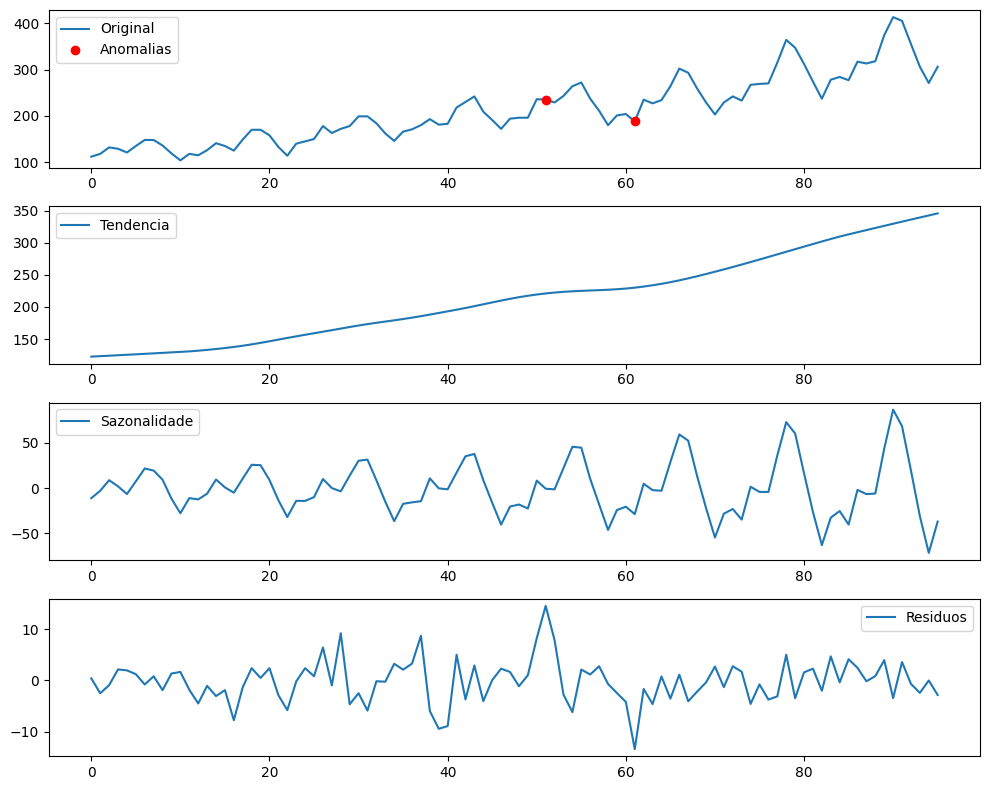

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
plt.plot(data_frame,label = 'Original')
plt.plot(anomalies, data_frame[anomalies], 'ro', markersize = 6, label = 'Anomalias')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(result.trend, label ='Tendencia')


plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(result.seasonal, label = 'Sazonalidade')


plt.legend(loc='best')
plt.subplot(4,1,4)
plt.plot(result.resid, label = 'Residuos')
plt.legend(loc='best')


plt.tight_layout()
plt.show()